In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv"
Df = pd.read_csv(url)

In [3]:
Df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
#drop the unnamed column
Df.drop("Unnamed: 0",axis=1,inplace=True)
Df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


### Statistical Analysis

In [5]:
Df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


* 'Average price' column does not seem to have many outliers
* other columns have outliers to some extent

In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [7]:
# change the date format
Df['Date'] = pd.to_datetime(Df['Date'])
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   float64       
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 1.6+ MB


In [8]:
Df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [9]:
df = Df.dropna()

In [10]:
df.shape

(1517, 13)

No null values

### Insights using Vizualization

### Year wise Observation count

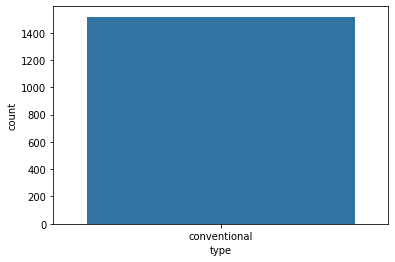

In [11]:
splot = sns.countplot(df['type'])

There is no data available for 'Organic' type

Average Price vs Month

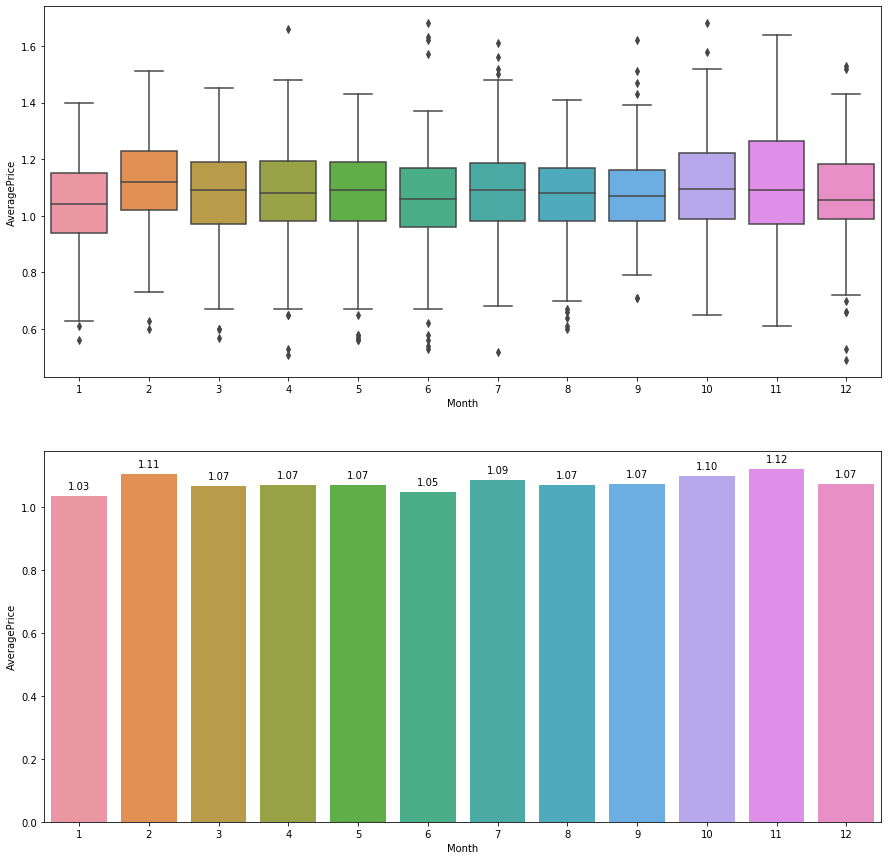

In [12]:
plt.figure(figsize=(15,15))
df_dt = df[['Date','AveragePrice']]
df_dt['Month'] = df['Date'].dt.month
df_month = df_dt.groupby('Month').mean()
plt.subplot(2,1,1)
sns.boxplot(x=df_dt['Month'],y = df_dt['AveragePrice'])
plt.subplot(2,1,2)
splot = sns.barplot(x=df_month.index,y = df_month['AveragePrice'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The Average price in the month of July and August are quite unstable due to the presence of outliers

Region wise count for each year

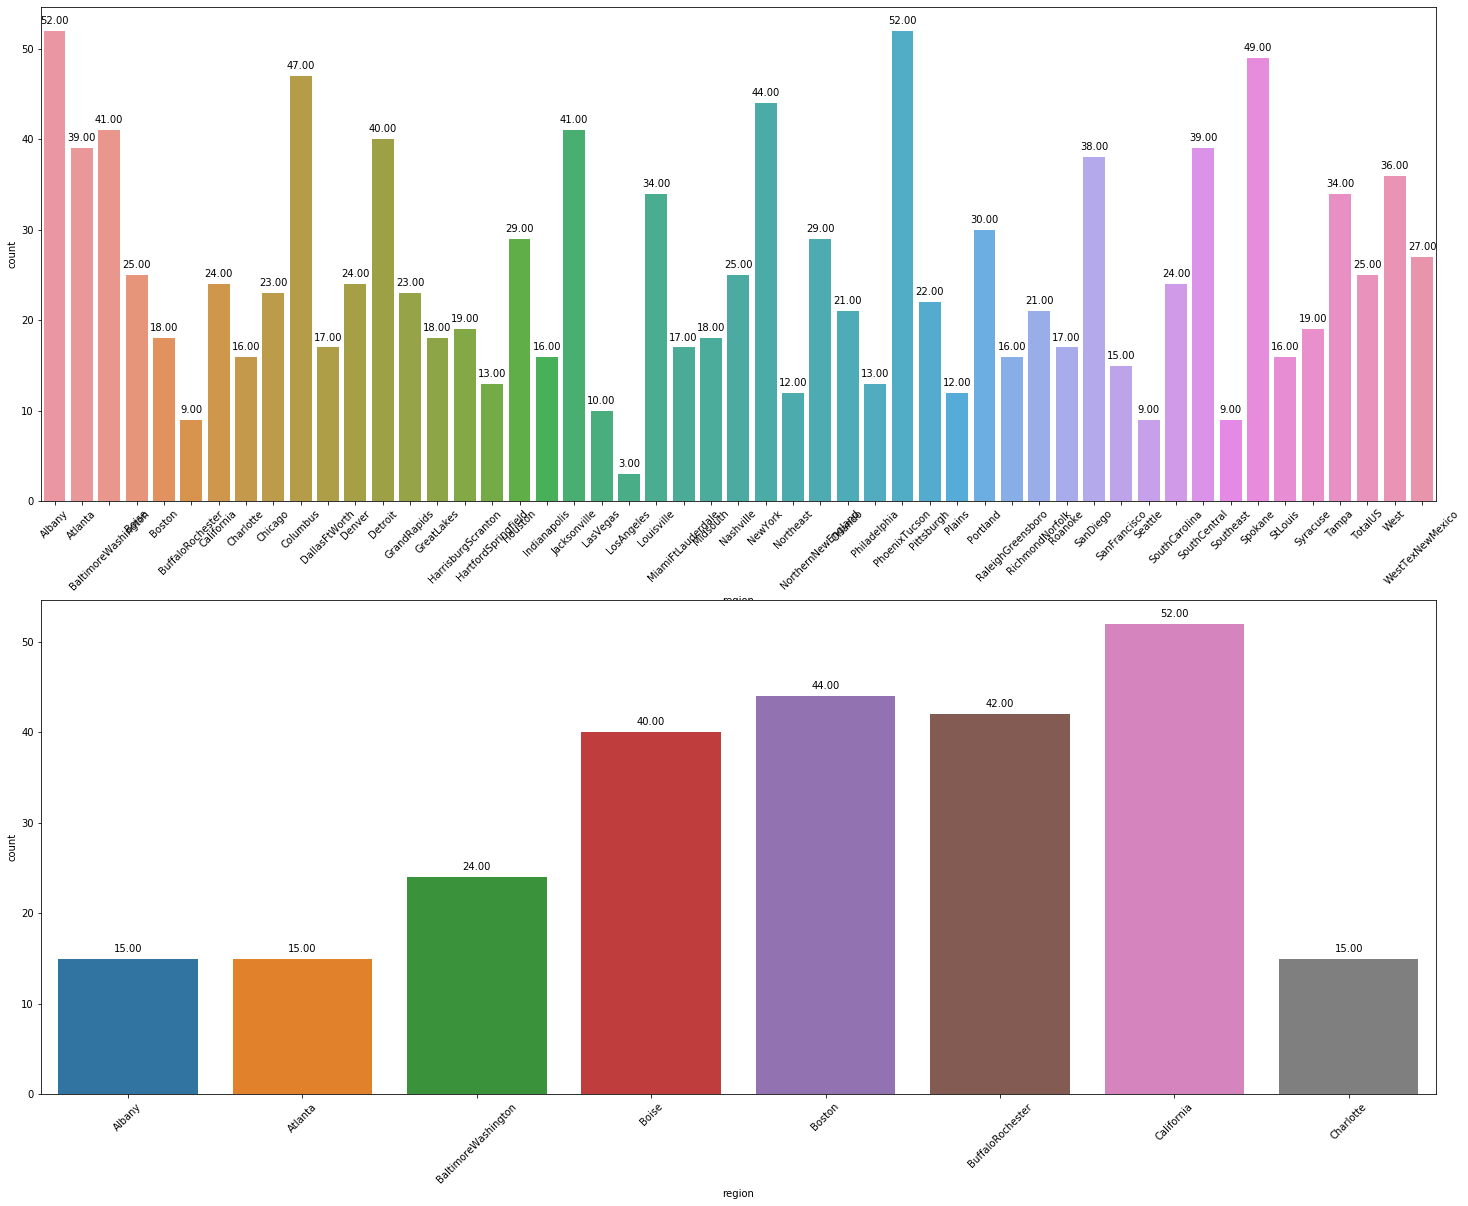

In [13]:
plt.figure(figsize=(25,20))
for i in range(2):
    plt.subplot(2,1,i+1)
    splot = sns.countplot(x=df[df['year']==2015+i]['region'])
    splot.set_xticklabels(splot.get_xticklabels(),rotation=45)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

There has been sales in more regions in 2015 than in 2016

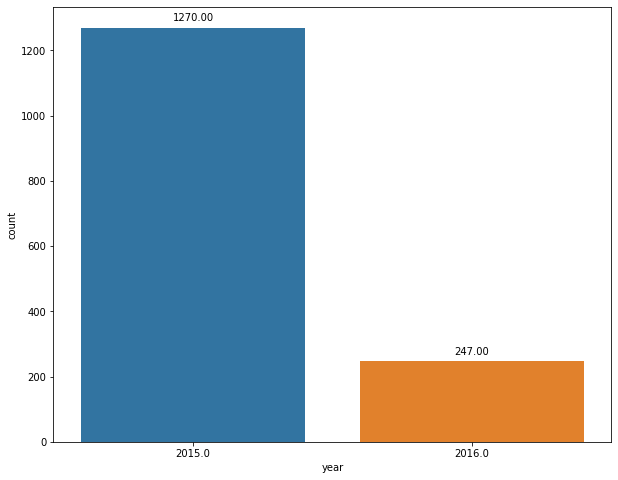

In [14]:
plt.figure(figsize=(10,8))
splot = sns.countplot(x=df['year'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Lower no. of obsrvations available for year 2016

#### No. of observations per region

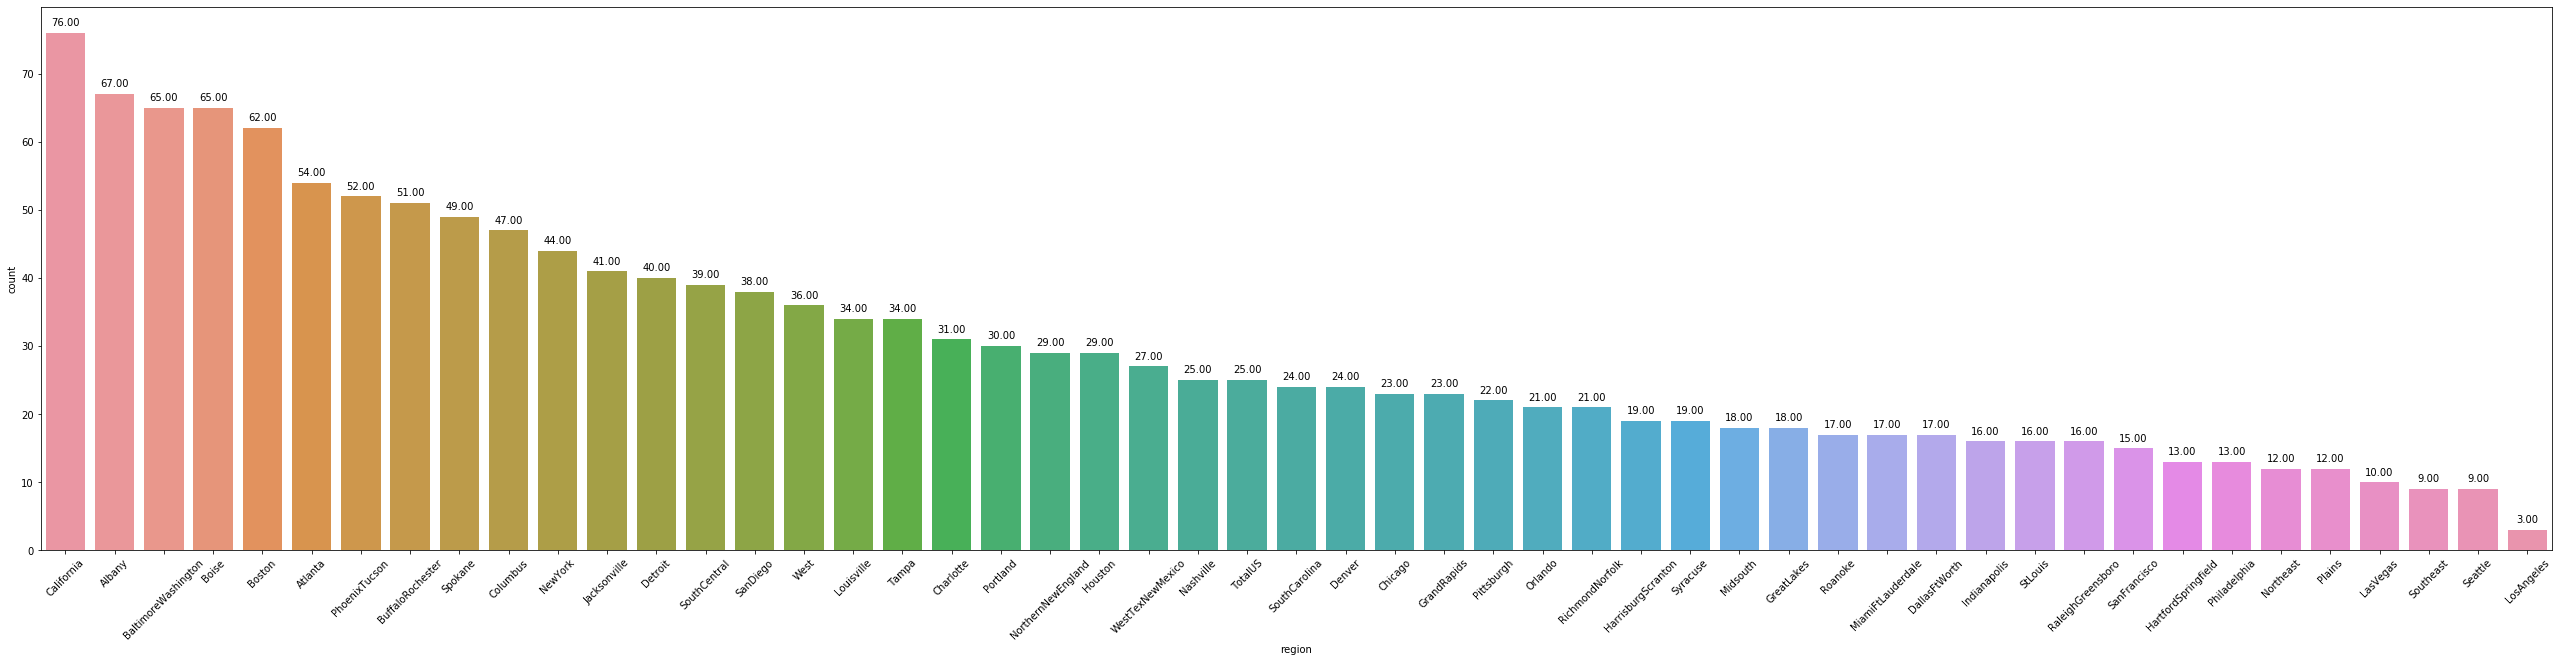

In [15]:
plt.figure(figsize=(45,10))
splot = sns.countplot(x=df['region'],order = df['region'].value_counts().index)
splot.set_xticklabels(splot.get_xticklabels(),rotation=45)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Lowest no. of Observations from Los Angels
* Highest no. of observations from California

#### Average price vs Region(For each year)

<Figure size 2160x1440 with 0 Axes>

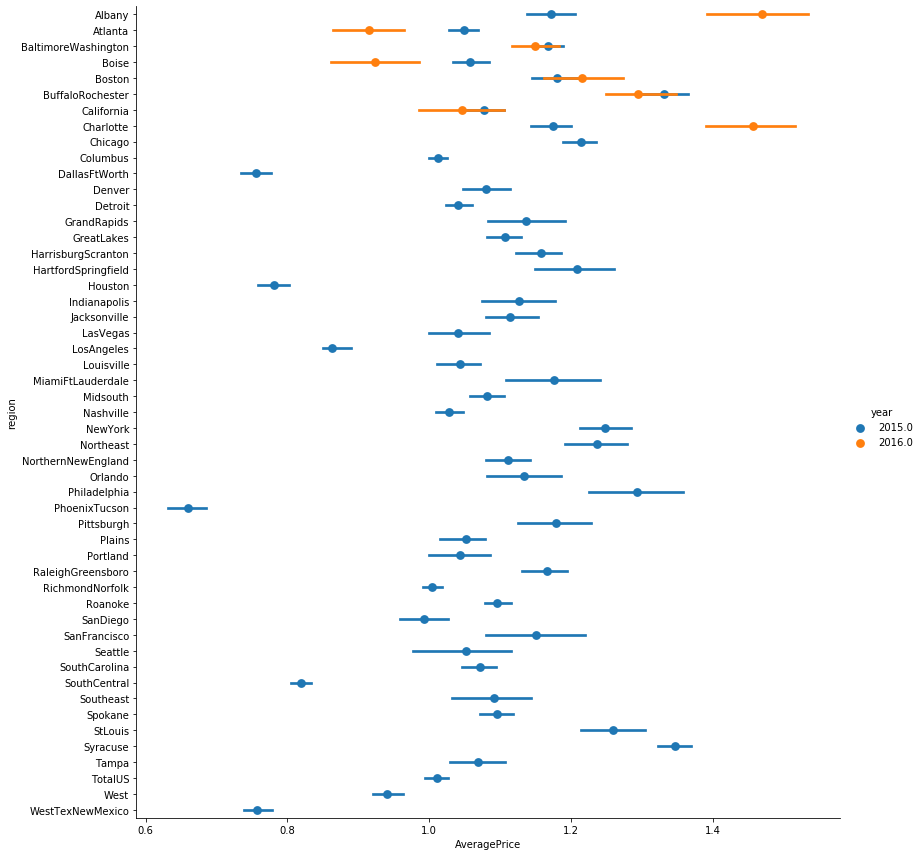

In [16]:
df_2015 = df[df['year']==2015]
df_2016 = df[df['year']==2016]
plt.figure(figsize=(30,20))
# plt.subplot(1,2,1)
sns.factorplot(y='region',x='AveragePrice',hue='year',data = df,join=False,size=12)
# plt.subplot(1,2,2)
# sns.boxplot(y=df_2016['region'],x=df_2016['AveragePrice'])

* Regions Price increased from 2015 to 2016 - Charlotte, Albany, Boston
* In Atlanta and Boise there was a significant decrease in prices from 2015 to 2016
* In the other regions there was a slight decrease(negligible) in prices from 2015 to 2016
* Average Price Lowest in Phoenix Tucson(2015)
* Average Price Highest in Charlotte(2016)

### REMOVING OUTLIERS

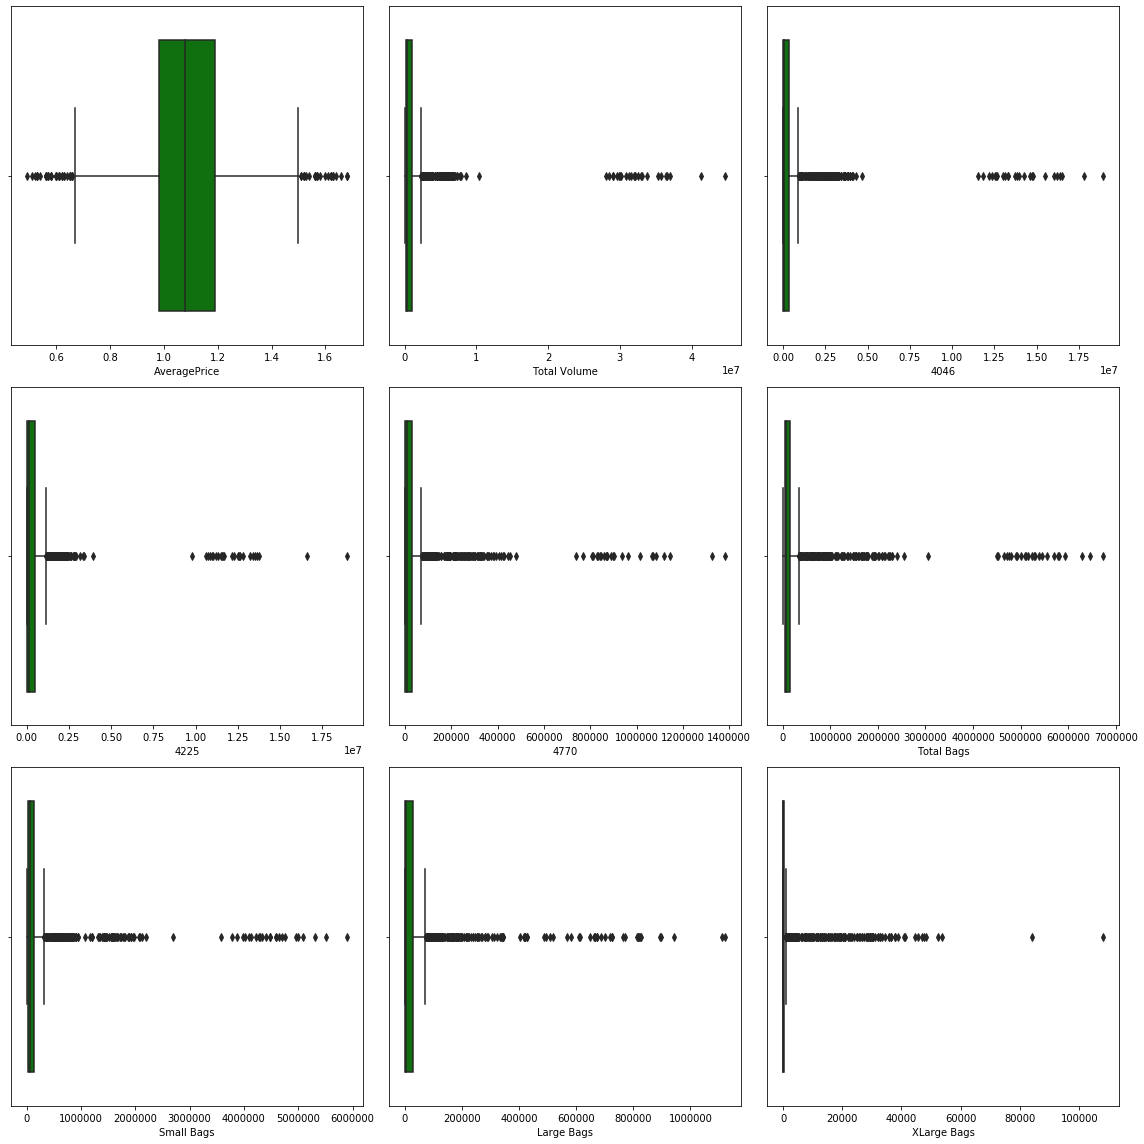

In [17]:
cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[cols[i]],color='green',orient='h')
    plt.tight_layout()

There are lot of outliers in our data which is evident from the boxplot.

In [18]:
Df.shape

(16468, 13)

In [19]:
temp_df = df[cols]
threshold = 3

In [20]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
np.where(z>threshold)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [21]:
df_new = df[(z<threshold).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [22]:
#Percentage of data lost
((1517-len(df_new))/1517)*100

5.339485827290705

Percentage of outliers are slightly more than 5%, therefore we will try to remove outliers by IQR method

In [23]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
iqr

AveragePrice         0.21
Total Volume    834505.09
4046            357178.14
4225            443674.28
4770             28256.05
Total Bags      121402.79
Small Bags      116472.13
Large Bags       28726.93
XLarge Bags        401.48
year                 0.00
dtype: float64

In [24]:
df_new1 = df[~ ( (temp_df<(q1-1.5*iqr)) | (temp_df>(q3+1.5*iqr)) ).any(axis=1)]
df_new1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2016-04-12,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,48016.74,11766.37,0.00,conventional,2016.0,Charlotte
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [25]:
#Percentage of data lost
((1517-len(df_new1))/1517)*100

33.421226104152936

33% of data is lost in IQR method, hence it cannot be used

We can increase the threshold to 3.3 in zscore method

In [26]:
threshold = 3.19

In [27]:
z1 = np.abs(zscore(temp_df))
np.where(z1>threshold)

(array([ 398,  401,  409,  412, 1016, 1017, 1182, 1182, 1182, 1182, 1182,
        1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183, 1183, 1183, 1184,
        1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185, 1185, 1185, 1185,
        1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186, 1186, 1186, 1187,
        1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188, 1188, 1188, 1188,
        1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189, 1189, 1189, 1190,
        1190, 1190, 1190, 1190, 1190, 1190, 1190, 1191, 1191, 1191, 1191,
        1191, 1191, 1191, 1191, 1192, 1192, 1192, 1192, 1192, 1192, 1192,
        1193, 1193, 1193, 1193, 1193, 1193, 1193, 1194, 1194, 1194, 1194,
        1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195, 1195, 1195, 1195,
        1196, 1196, 1196, 1196, 1196, 1196, 1196, 1197, 1197, 1197, 1197,
        1197, 1197, 1197, 1198, 1198, 1198, 1198, 1198, 1198, 1198, 1198,
        1199, 1199, 1199, 1199, 1199, 1199, 1199, 1200, 1200, 1200, 1200,
        1200, 1200, 1200, 1201, 1201, 

In [28]:
df_new2 = df[(z1<threshold).all(axis=1)]
df_new2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [29]:
#Percentage of data lost
((1517-len(df_new2))/1517)*100

4.746209624258404

#### The loss percentage is less than 5% for a threshold value of 3.2, so we proceed with z score method

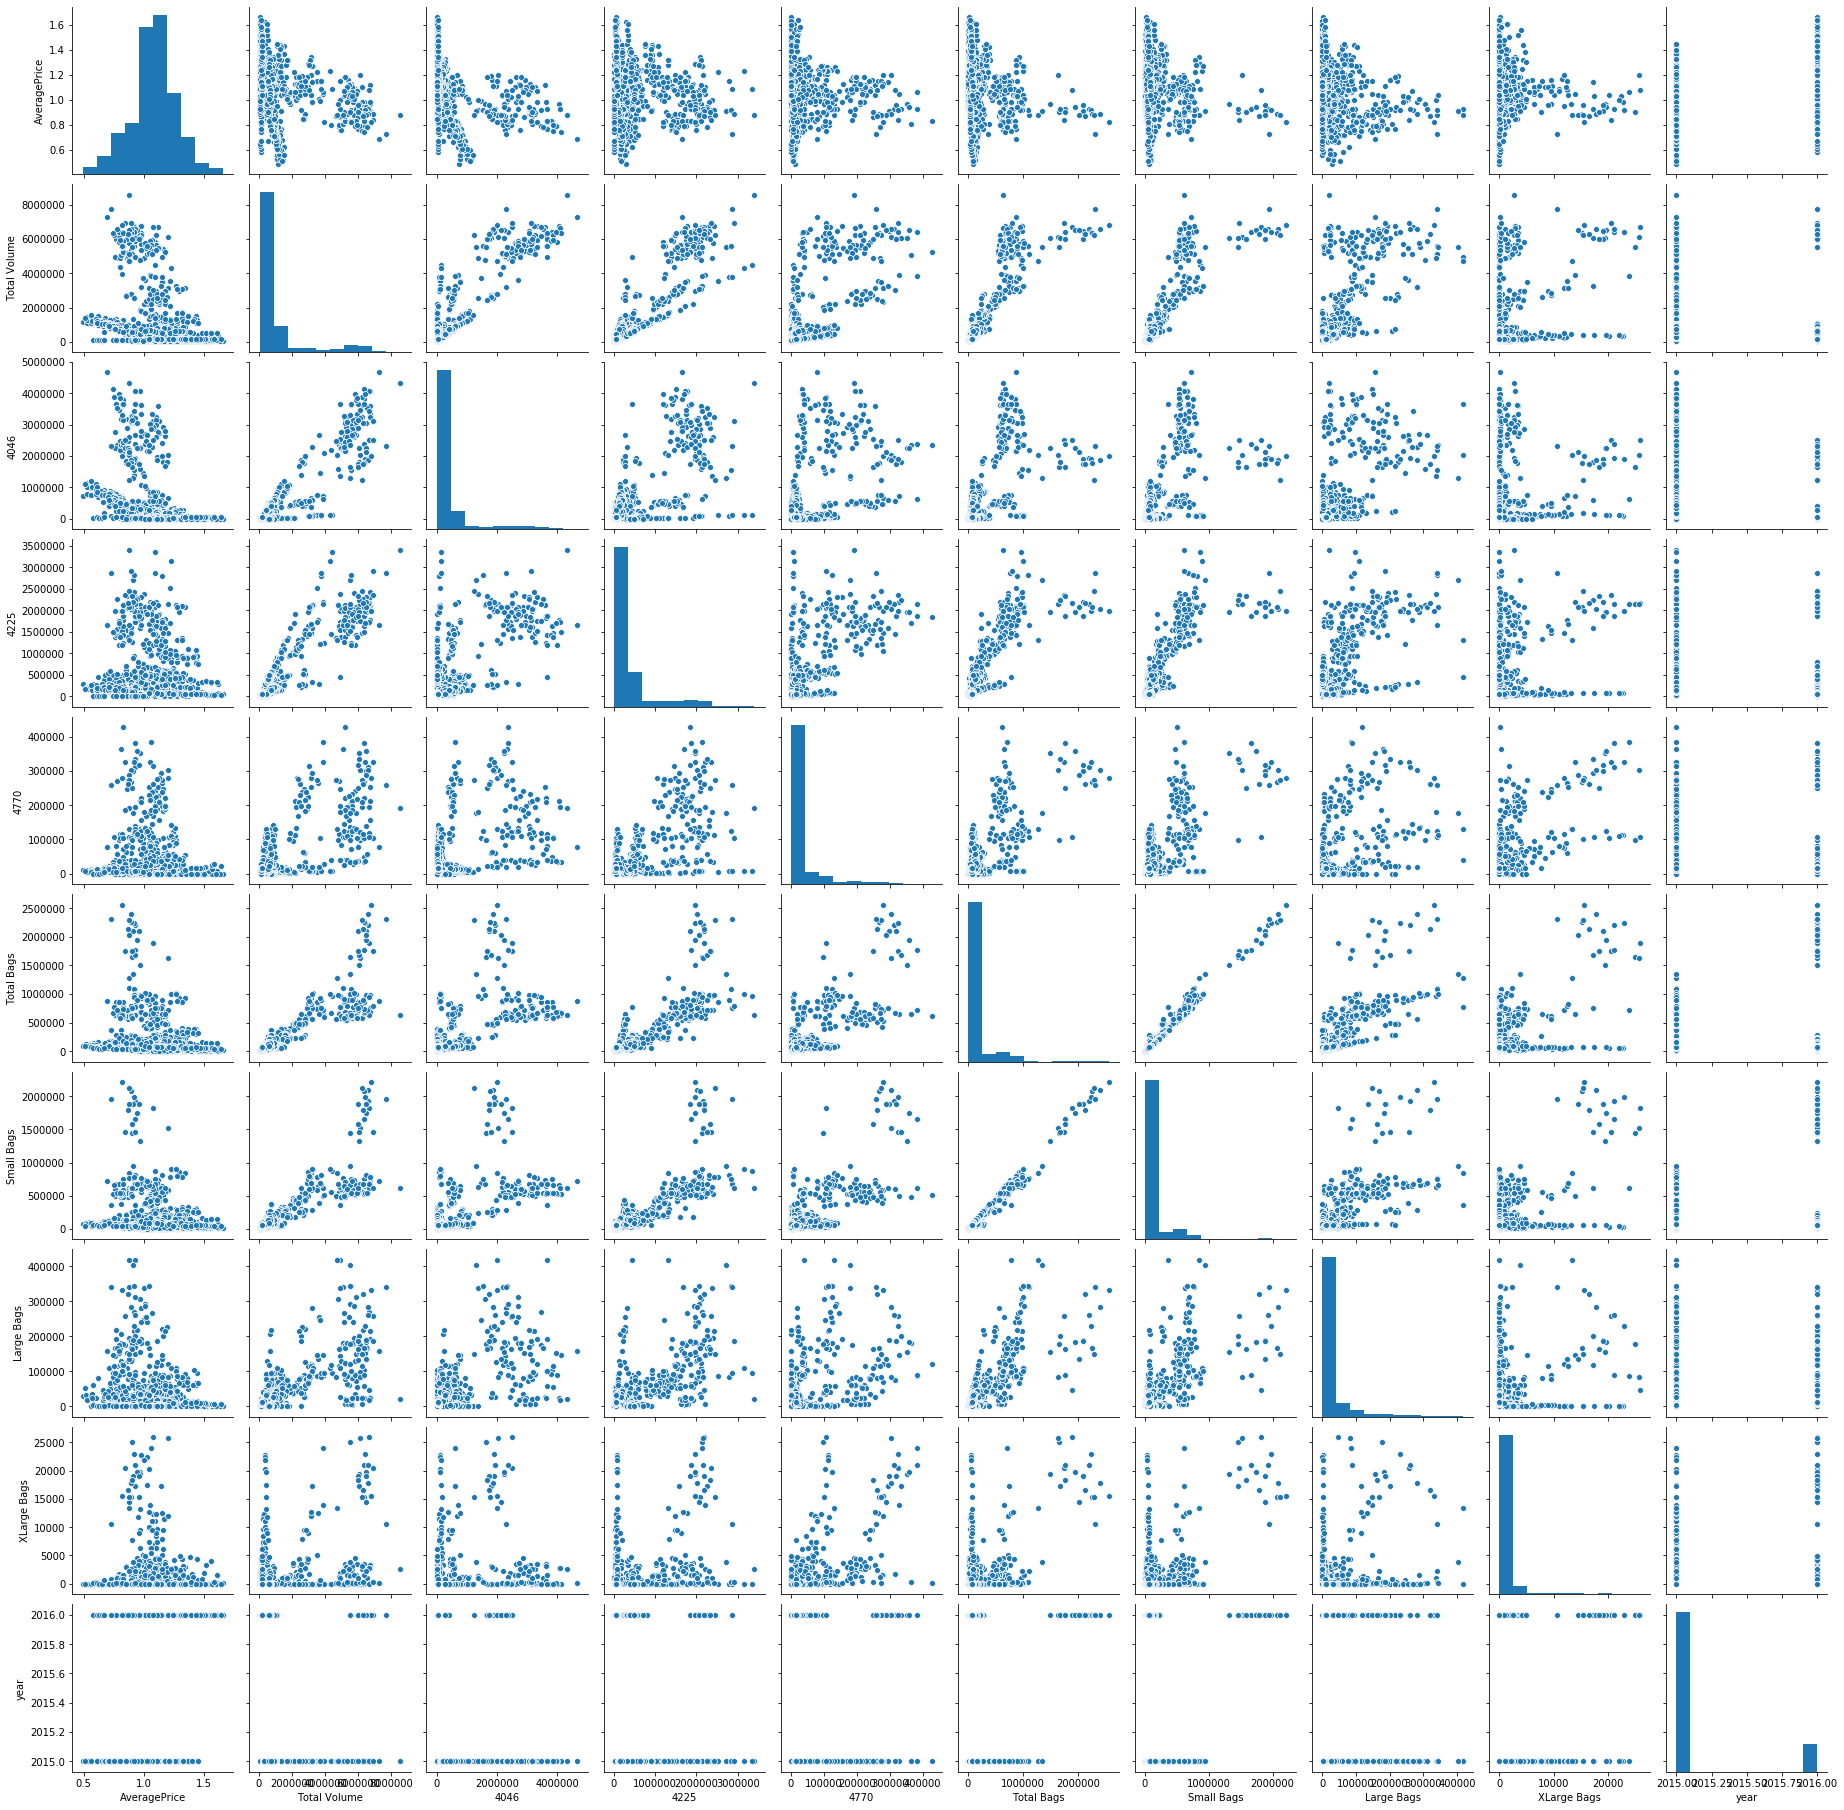

In [30]:
sns.pairplot(df_new2)

### LABEL ENCODING

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['type','region']:
    df_new2[col] = label_encoder.fit_transform(df_new2[col])
df_new2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015.0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015.0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015.0,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015.0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016.0,7
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016.0,7
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016.0,7
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016.0,7


In [32]:
x_reg = df_new2.iloc[:,2:]
y_reg = df_new2.iloc[:,1]

x_class = df_new2.iloc[:,1:-1]
y_class = df_new2.iloc[:,-1]

### REMOVING SKEWNESS

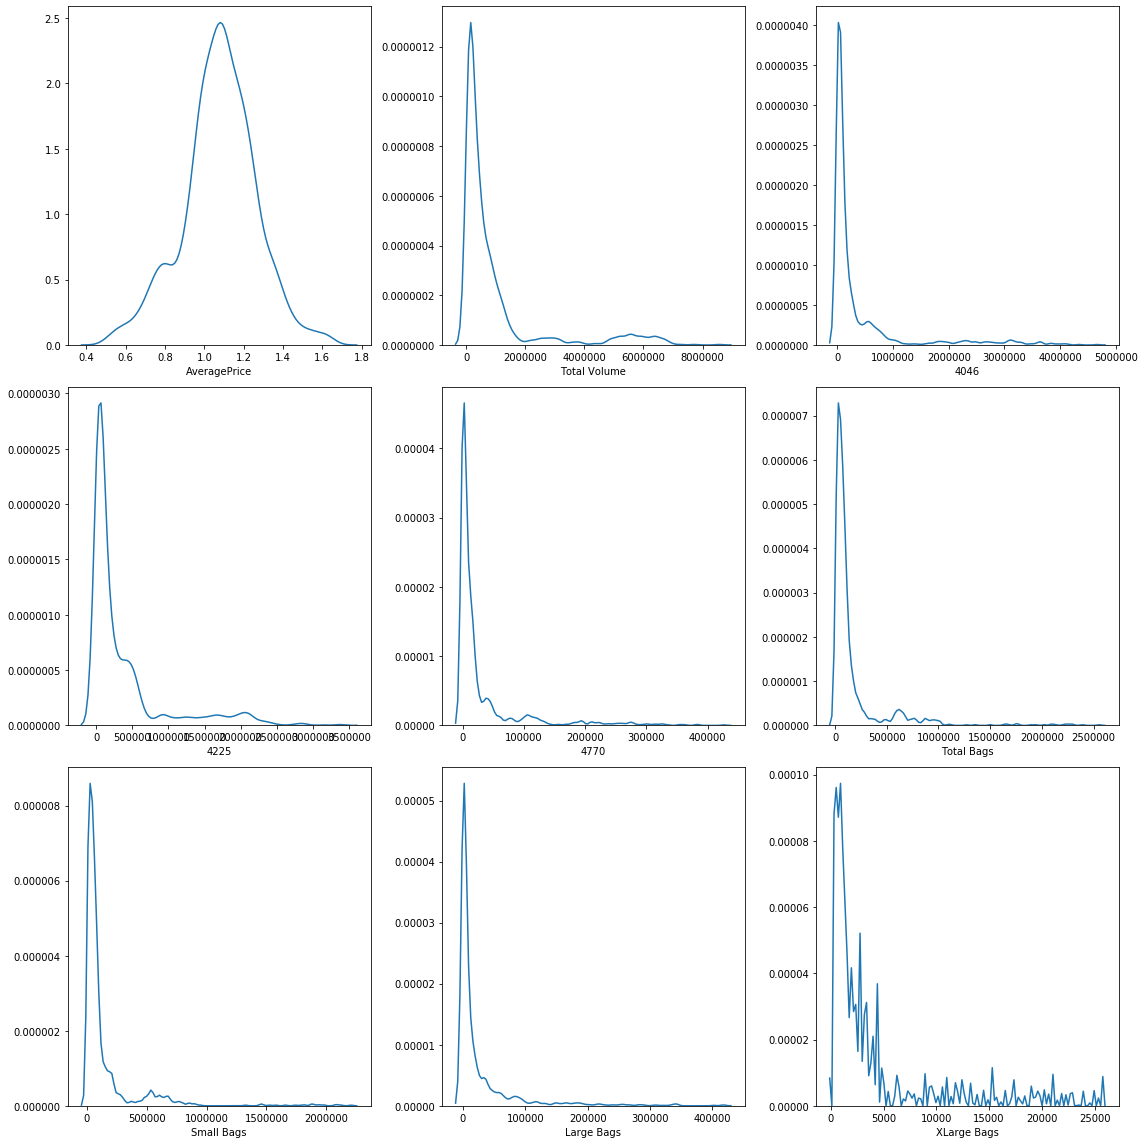

In [33]:
plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(df_new2[cols[i]],hist = False)
    plt.tight_layout()

* AveragePrice is normally distributed
* Other columns have slight left skewness

In [34]:
df_new2.skew()

AveragePrice   -0.175711
Total Volume    2.632446
4046            3.047365
4225            2.329572
4770            3.269828
Total Bags      4.091144
Small Bags      4.339705
Large Bags      3.709054
XLarge Bags     5.042916
type            0.000000
year            1.975811
region          0.266410
dtype: float64

* Skewness Acceptable range is(+/-0.5)
* Only AveragePrice Columns is not skewed


In [35]:
from sklearn.preprocessing import power_transform
x_reg = power_transform(x_reg,method='yeo-johnson')
x_class = power_transform(x_class,method='yeo-johnson')

### PREDICTION (AVG. PRICE) - REGRESSION

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x_reg)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
models = {
    "Linear Regression" : {'model':LinearRegression(),
                           'params':{}
                          }, 
    "Ridge" : {'model':Ridge(),
               'params':{'alpha':[200, 250, 275, 300, 500]}
              }, 
    "Decision Tree" : {'model':DecisionTreeRegressor(),
                       'params':{'max_depth' : [5],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestRegressor(),
                       'params':{'n_estimators':[100,150],
                                 'max_depth':[5,8,50,100,150,200], 
                                 'min_samples_leaf':[1,2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsRegressor(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan']
                                      }
                            }
}

In [37]:
max_scr = 0

for r_s in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y_reg,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        r2 = r2_score(y_test,pred_test)
        if r2 > max_scr:
            max_scr = r2
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",r_s)
            

Model :  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Score :  0.8756761954089431
Random State :  99


In [38]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_t,y_reg,random_state=99,test_size=0.20)
grid = GridSearchCV(models['Random Forest']['model'], models['Random Forest']['params'], cv=4, scoring = 'r2')
grid.fit(x_train,y_train)
print({
    'model': 'Random Forest',
    'best_score' : np.sqrt(np.abs(grid.best_score_)),
    'best_params' : grid.best_params_
})
# {'n_estimators':[100]}

{'model': 'Random Forest', 'best_score': 0.8859933774854197, 'best_params': {'max_depth': 150, 'min_samples_leaf': 1, 'n_estimators': 150}}


### RANDOM FOREST REGRESSOR IS THE BEST MODEL WITH R2 SCORE OF 0.88

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
random_forest = RandomForestRegressor(max_depth=50, min_samples_leaf=1, n_estimators=150)
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
print('R2 Score : ',r2_score(y_test,y_pred))
print('RMSE Score : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MSE Score : ',mean_squared_error(y_test,y_pred))
print('RMAE Score : ',np.sqrt(mean_absolute_error(y_test,y_pred)))

R2 Score :  0.8175689562094177
RMSE Score :  0.0853386873861016
MSE Score :  0.007282691564782776
RMAE Score :  0.24563408049255556


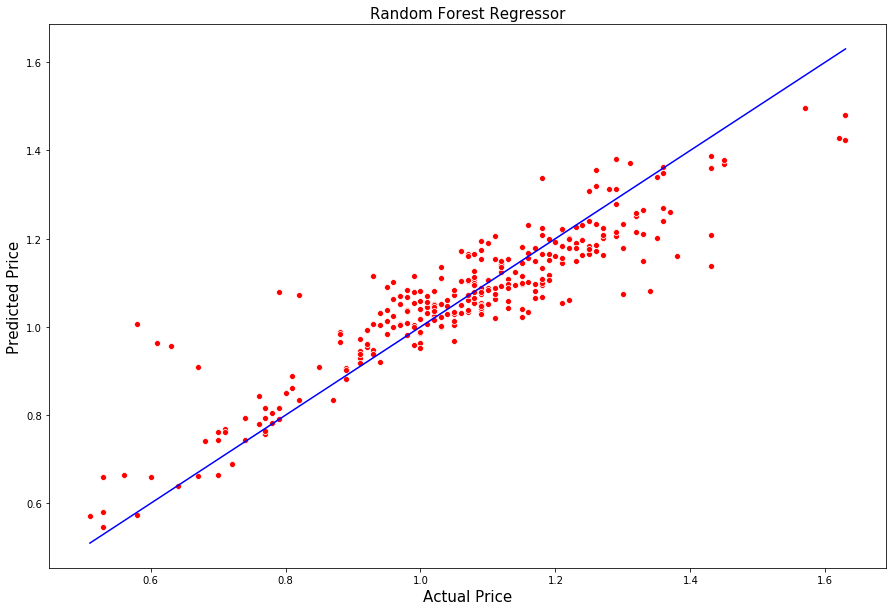

In [40]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(y_test,y_pred,color='r')
ax = sns.lineplot(y_test,y_test,color='b')
ax.set_xlabel('Actual Price',fontsize=15)
ax.set_ylabel('Predicted Price',fontsize=15)
ax.set_title('Random Forest Regressor',fontsize=15)
plt.show()

In [41]:
import joblib
joblib.dump(random_forest,"Random_forest_avacado_regressor.pkl")

['Random_forest_avacado_regressor.pkl']

### PREDICTION (REGION) - CLASSIFICATION

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_c = sc.fit_transform(x_class)
x_c = pd.DataFrame(x_c)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "SVC" : {'model':SVC(),
             'params':{'kernel' :['poly', 'rbf', 'sigmoid'],
                       'gamma':['scale', 'auto']
                      },
            },
    "Decision Tree" : {'model':DecisionTreeClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'criterion' :['gini','entropy'],
                                 'max_depth' : [5,8,50,100,150],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'max_depth':[5,8,50,100,150], 
                                 'min_samples_leaf':[2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsClassifier(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan','minkowski']
                                      }
                            }
}

In [43]:
max_scr = 0

for r_s in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_c,y_class,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        acc = accuracy_score(y_test,pred_test)
        if acc > max_scr:
            max_scr = acc
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",r_s)
#             print(i,j['model'])

Model :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score :  0.9930795847750865
Random State :  99


### RANDOM FOREST CLASSIFIER IS THE BEST MODEL WITH ACCURACY SCORE OF 0.99

In [44]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_c,y_class,random_state=99,test_size=0.20)
grid = GridSearchCV(models['Random Forest']['model'], models['Random Forest']['params'], cv=4, scoring = 'accuracy')
grid.fit(x_train,y_train)
print({
    'model': 'Random Forest',
    'best_score' : np.sqrt(np.abs(grid.best_score_)),
    'best_params' : grid.best_params_
})

{'model': 'Random Forest', 'best_score': 0.981225136330134, 'best_params': {'max_depth': 150, 'min_samples_leaf': 2, 'n_estimators': 100}}


In [45]:
from sklearn.metrics import roc_auc_score, roc_curve
random_forest = RandomForestClassifier(max_depth=150, min_samples_leaf=2, n_estimators=150)
clf = random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))

Accuracy Score :  0.9204152249134948


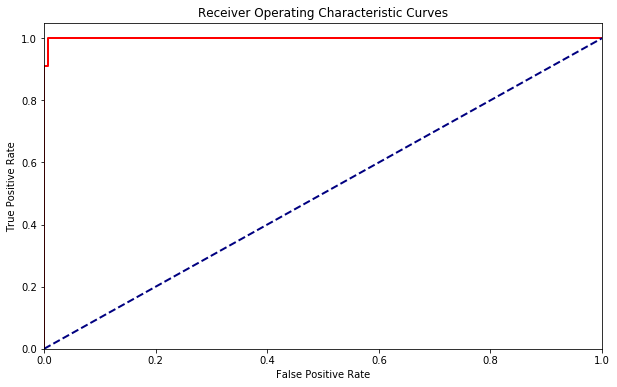

In [46]:
predictions = clf.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,6))
x = roc_curve(y_test, predictions,pos_label = True)
plt.plot(x[0], x[1], color='red', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

In [47]:
import joblib
joblib.dump(random_forest,"Random_forest_avacado_classifier.pkl")

['Random_forest_avacado_classifier.pkl']